# >>>>>>>>>>[ ONLINE PAYMENT FRAUD DETECTION ]<<<<<<<<<<

# IMPORTING DIRECTORIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [4]:
df=pd.read_csv('Online Payment Fraud Detection.csv')

In [5]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


# Understanding Data

In [6]:
df.shape

(1048575, 10)

In [7]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [8]:
df.describe().astype(int)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575
mean,26,158666,874009,893808,978160,1114197,0
std,15,264940,2971750,3008271,2296780,2416593,0
min,1,0,0,0,0,0,0
25%,15,12149,0,0,0,0,0
50%,20,76343,16002,0,126377,218260,0
75%,39,213761,136642,174599,915923,1149807,0
max,95,10000000,38900000,38900000,42100000,42200000,1


In [9]:
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [10]:
len(df.nameDest.unique())

449635

In [11]:
len(df.nameOrig.unique())

1048317

# Exploratory Data Analysis

<AxesSubplot:>

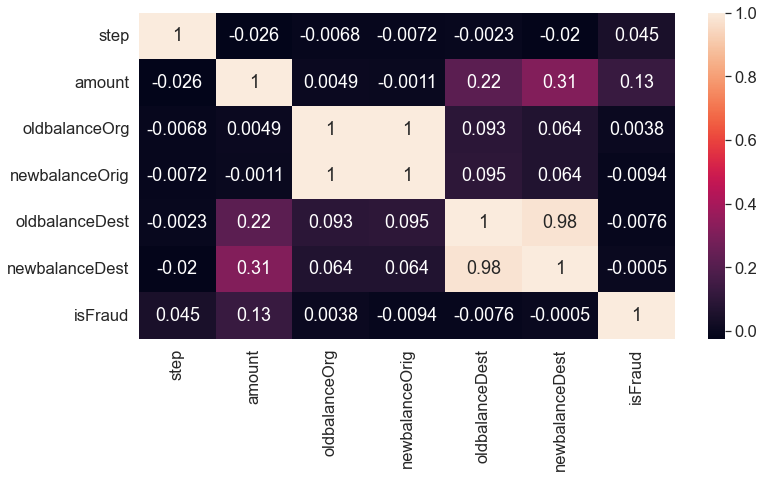

In [51]:
# Showing  relationship between each columns using heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

In [12]:
#Count of all the different types of transaction
df.groupby('type').amount.count().sort_values(ascending=False)

type
CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: amount, dtype: int64

In [14]:
#How many transactions are fraud
fraud=df.groupby('isFraud').amount.count()
fraud

isFraud
0    1047433
1       1142
Name: amount, dtype: int64

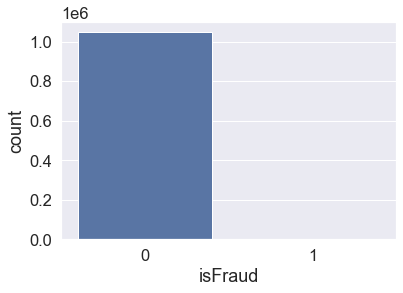

In [45]:
sns.countplot(x='isFraud',data=df)
plt.show()
#The graph is not balabce because less than 1% of the transaction in fraud

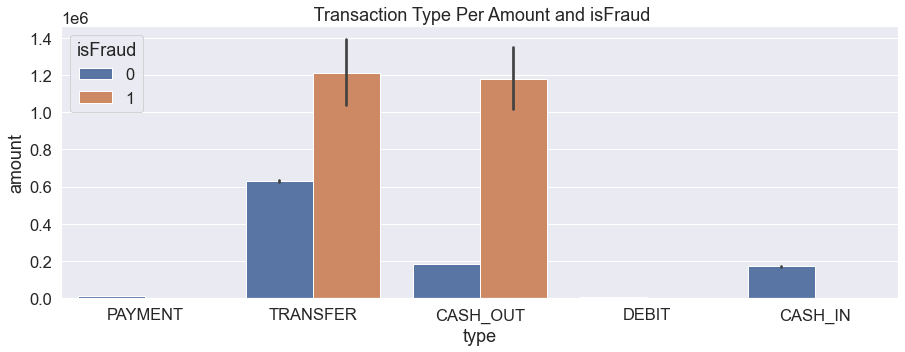

In [15]:
#What type of transaction include fraud
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(15,5))
sns.barplot(x='type',
                y='amount',
                 hue='isFraud',
                 data=df,
                ).set_title(" Transaction Type Per Amount and isFraud")
plt.show()

<AxesSubplot:xlabel='type', ylabel='count'>

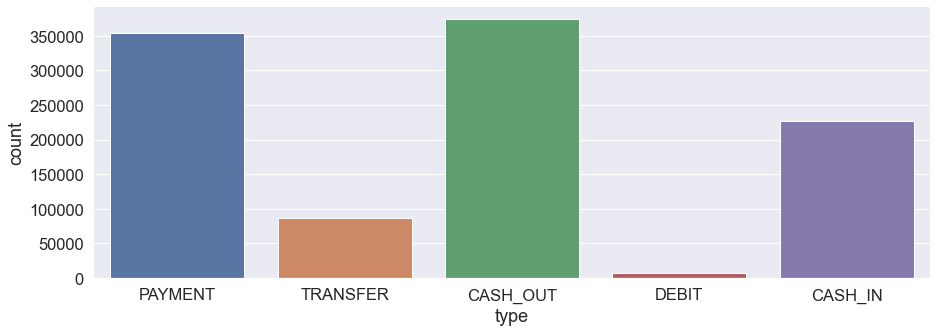

In [41]:
# What type of transation has was used most?
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(15,5))
sns.countplot(x='type',data=df)

<AxesSubplot:xlabel='type', ylabel='amount'>

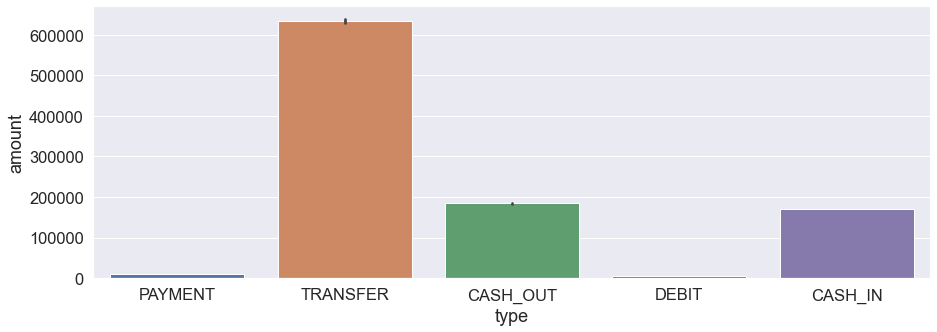

In [43]:
# What type of transation recorded more monetary value?
sns.set_theme(font_scale=1.5)
plt.figure(figsize=(15,5))
sns.barplot(x='type',y='amount',data=df)

<AxesSubplot:ylabel='amount'>

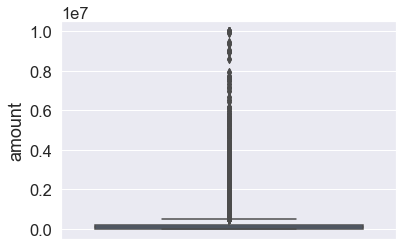

In [54]:
# The boxplot shows that we have outliers present in the amount column
sns.boxplot(data=df,y='amount')

# Feature Engineering

In [28]:
at= [ 'type']

In [29]:
at_dummies= pd.get_dummies(df[at])

In [30]:
at_dummies.head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [31]:
new = pd.concat([df,at_dummies], axis=1)
print(new.shape)
new.head()

(1048575, 15)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [32]:
new_df = new.drop(at,axis=1)

new_df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,1,0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,1
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,1,0,0,0
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0,1,0,0,0
1048571,95,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0,0,0,1,0
1048572,95,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0,0,0,1,0
1048573,95,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0,0,0,1,0


In [33]:
  #importing libraries
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [34]:
y=df.isFraud

In [35]:
y 

0          0
1          0
2          1
3          1
4          0
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: isFraud, Length: 1048575, dtype: int64

In [36]:
X=new_df.drop(columns=['isFraud','nameOrig','nameDest'])
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

In [76]:
model=LogisticRegression()
model.fit(X,y)
pre=model.predict(X_test)
score=accuracy_score(y_test,pre)
Fraud=(score*100)
nfraud=100-(score*100)scv 
print(f'{Fraud}% of the Transaction is Non-Fraund')
print(f'{nfraud}% of the Transaction is Fraud')
#print(classification_report(pre,y_test)) 

99.9% of the Transaction is Non-Fraund
0.09999999999999432% of the Transaction is Fraud


In [60]:
model=DecisionTreeClassifier()
model.fit(X,y)
pre=model.predict(X_test)
score=accuracy_score(y_test,pre)
Fraud=(score*100)
nfraud=100-(score*100)
print(f'{Fraud}% of the Transaction is Non-Fraund')
print(f'{nfraud}% of the Transaction is Fraud')
#print(classification_report(pre,y_test))

100.0% of the Transaction is Non-Fraund
0.0% of the Transaction is Fraud
